# El sesgo

En esta lección veremos otro de los efectos que resulta de trabajar con una muestra de datos y no con la población: el sesgo.

Comenzaremos viendo un ejemplo práctico que nos permitirá tener una idea intuitiva del sesgo y luego de esto veremos una definición formal del concepto.

Luego hablaremos de los dos tipos de sesgo que existen comúnmente y algunas alternativas para reducir este fenómeno. Y al finalizar resumiremos los principales aspectos a tener en cuenta al momento de analizar nuestros datos bajo esta perspectiva.

## 1. Idea intuitiva

Para entender el concepto del sesgo comencemos con un ejemplo práctico.

Supongamos una situación **hipotética**: contamos con datos de la población (es decir todos los datos) de un total de 10.000 clientes. Y por cada cliente conocemos su edad y sus ingresos anuales (en miles de dólares).

Y supongamos que queremos caracterizar esta población midiendo su media y su varianza **pero a partir de una muestra de 1.000 personas**.

La idea es comparar los valores reales de la media y la varianza tanto en la población como en la muestra usando dos tipos de muestreo: NO aleatorio y aleatorio.

Para llevar a cabo este ejercicio comencemos leyendo el set de datos *dataset-edad-ingresos.csv* que contiene los datos de la población:

In [47]:
# Leer dataset de la población
import pandas as pd
ruta=r"/Users/hectorrr/proyectos/pruebas prametricas/dataset-edad-ingresos.csv"
pob = pd.read_csv(ruta)
pob

,Edad,Ingresos (USDx1000)
0,37,140.7
1,59,191.2
2,65,175.5
3,62,177.9
4,56,170.4
...,...,...
9995,18,79.2
9996,68,112.6
9997,22,125.7
9998,35,25.0


Recordemos que estamos considerando una situación **hipotética** y que por tanto estamos suponiendo que podemos tener todos estos datos (en la práctica sólo podremos acceder a una muestra).

Ahora obtengamos una primera muestra NO aleatoria con 1.000 datos. Para ello simplemente tomemos las 1.000 primeras filas del set de datos original y generemos un gráfico de dispersión para entender cómo están distribuidos los datos:

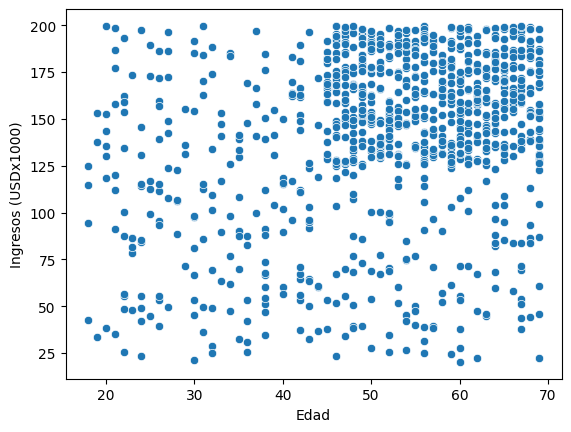

In [48]:
# Tomar muestra NO aleatoria de 1000 datos y graficarla
import seaborn as sns

muestra_na = pob.iloc[0:1000,:]
ax = sns.scatterplot(muestra_na, x='Edad', y='Ingresos (USDx1000)')

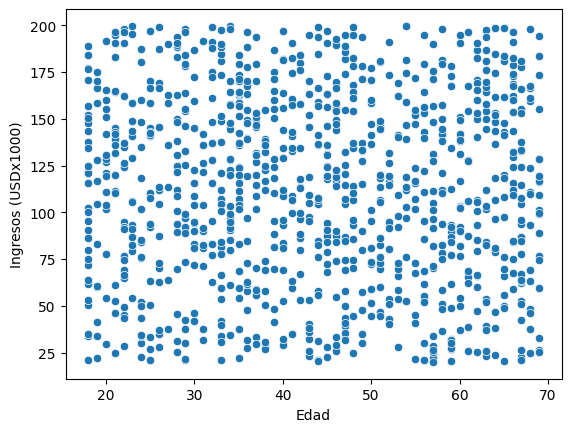

In [49]:
ax = sns.scatterplot(pob.iloc[2000:3000,:], x='Edad', y='Ingresos (USDx1000)')

Vemos algo interesante en esta muestra NO aleatoria: hay mayor densidad de puntos (es decir más datos) en la región de ~45 años en adelante e ingresos por encima de ~120.000. Como veremos en un momento esta muestra tiene un **sesgo bastante alto**.

Veamos ahora qué ocurre si tomamos una muestra aleatoria, escogiendo **aleatoriamente** 1.000 registros a partir de la población total:

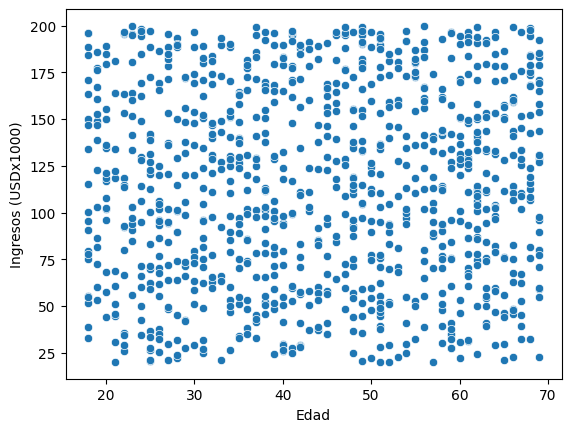

In [50]:
# Tomar muestra aleatoria de 1000 datos y graficarla
muestra_a = pob.sample(1000)
ax = sns.scatterplot(muestra_a, x='Edad', y='Ingresos (USDx1000)')

En este caso vemos que los datos están uniformemente distribuidos a través de todos los rangos de valores de Edad e Ingresos. Como veremos en un momento, esta muestra tiene un sesgo pero **menor que en el caso del muestreo NO aleatorio**.

Veamos ahora qué sucede si para cada set de datos (población, muestra no aleatoria y muestra aleatoria) calculamos la media y la desviación estándar:

In [51]:
# Problemas del bias: media y desviación

print('Población (media, desviación) - Valores de referencia:')
print(f'\tEdad: {pob["Edad"].mean():.1f}, {pob["Edad"].std():.1f}')
print(f'\tIngresos: {pob["Ingresos (USDx1000)"].mean():.1f}, {pob["Ingresos (USDx1000)"].std():.1f}')

print('='*30)
print('Muestra NO aleatoria (media, desviación) - Estimación:')
print(f'\tEdad: {muestra_na["Edad"].mean():.1f}, {muestra_na["Edad"].std():.1f}')
print(f'\tIngresos: {muestra_na["Ingresos (USDx1000)"].mean():.1f}, {muestra_na["Ingresos (USDx1000)"].std():.1f}')

print('='*30)
print('Muestra aleatoria (media, desviación) - Estimación:')
print(f'\tEdad: {muestra_a["Edad"].mean():.1f}, {muestra_a["Edad"].std():.1f}')
print(f'\tIngresos: {muestra_a["Ingresos (USDx1000)"].mean():.1f}, {muestra_a["Ingresos (USDx1000)"].std():.1f}')


Población (media, desviación) - Valores de referencia:
	Edad: 44.4, 14.9
	Ingresos: 113.4, 52.0
Muestra NO aleatoria (media, desviación) - Estimación:
	Edad: 51.5, 12.6
	Ingresos: 141.1, 45.3
Muestra aleatoria (media, desviación) - Estimación:
	Edad: 44.3, 15.2
	Ingresos: 114.5, 51.8


Aca podemos observar varias cosas importantes:

- Si idealmente pudiésemos adquirir datos de la población, esta tendría valores medios y de desviación de 44.4 y 14.9 para la Edad y 113.4 y 52.0 para los ingresos.
- Si tomamos una muestra NO aleatoria lo que tendremos será una **estimación** de esa media y desviación ideales. En este caso los valores obtenidos serán de 51.5 y 12.6 para la Edad y 141.1 y 45.3 para los Ingresos. **Estos valores son muy superiores a los valores de referencia de la población: tenemos un sesgo**.
- Si tomamos una muestra aleatoria también tendremos una **estimación** de la media y desviación ideales. En este caso tendremos valores de 44.7 y 14.8 para la Edad y de 113.9 y 51.5 para los Ingresos. De nuevo, tendremos un sesgo **pero este es menor al obtenido con el muestreo NO aleatorio**

Así que con este ejemplo ya estamos listos para definir el concepto del sesgo.

## 2. Definición

<p></p>
<div style="background-color: #F7CAC9; color: black; padding: 10px;">
    El sesgo ("bias") <b>es un error sistemático o desviación de una estimación estadística</b> del valor real que tendría el parámetro que estamos cuantificando en la población. Es decir que el sesgo es una tendencia a sobre-estimar o sub-estimar de forma consistente el parámetro que estamos intentando medir.
</div>

Es decir que matemáticamente podríamos decir que:

$$\text{estimación} = \text{valor real} \pm \text{sesgo}$$

Volvamos al ejemplo anterior y comparemos por ejemplo la media de la población (44.4 años) con las estimaciones obtenidas con cada muestreo:

|                      | Media Edad | Diferencia (vs. población) | Comentarios  |
|----------------------|------------|----------------------------|--------------|
| Muestra NO aleatoria | 51.5       | 51.5 - 44.4 = 7.1          | Sesgo "alto" |
| Muestra aleatoria    | 44.7       | 44.7 - 44.4 = 0.3          | Sesgo "bajo" |

Vemos que en ambos casos hay sesgo, pero este sesgo es menor en el caso del muestreo aleatorio.

Pero en ambos casos:

- La media estimada se aleja (o desvía) del valor real en la población.
- En ambos casos se sobre-estima el parámetro (la media), aunque podría también haber sub-estimación

Podemos ver que este sesgo **siempre** estará presente a menos que tengamos el total de los datos.

Por ejemplo, veamos cómo cambia el sesgo cuando tomamos más y más muestras aleatorias:

In [52]:
# Tomar muestras aleatorias con 1.000, 3.000, 5.000, 7.000 y 9.000 datos
# En cada caso imprimir media de la edad en la población y en la muestra así como sus diferencias
# (estimación - valor real)

mu = pob['Edad'].mean()
mu_dolar=pob["Ingresos (USDx1000)"].mean()
N = [1000, 3000, 5000, 7000, 9000]
print('Comparativo (n, mu, media_muestral, diferencia)')
for n in N:
    # Muestra aleatoria
    muestra = pob.sample(n)
    desviacion_dolares=pob.sample(n)
    # Estimar media
    media_muestral = muestra['Edad'].mean()
    media_dolares=desviacion_dolares["Ingresos (USDx1000)"].mean()
    # Imprimir comparativo
    #print(f'n = {n}: {mu:.2f}, {media_muestral:.2f}, {media_muestral-mu:.2f}')
    print(f'n_dolares = {n}: {mu_dolar:.2f}, {media_dolares:.2f}, {media_dolares-mu_dolar:.2f}')

Comparativo (n, mu, media_muestral, diferencia)
n_dolares = 1000: 113.41, 115.05, 1.64
n_dolares = 3000: 113.41, 113.81, 0.40
n_dolares = 5000: 113.41, 113.40, -0.01
n_dolares = 7000: 113.41, 113.04, -0.37
n_dolares = 9000: 113.41, 113.34, -0.06


In [53]:
pob.describe()

,Edad,Ingresos (USDx1000)
count,10000.000000,10000.000000
mean,44.394700,113.405570
std,14.944412,52.024012
min,18.000000,20.000000
25%,32.000000,68.500000
50%,45.000000,116.200000
75%,57.000000,158.400000
max,69.000000,199.900000


In [54]:
import numpy as np
pob["cluster"]=np.where(pob["Ingresos (USDx1000)"]<68.5,"pobre",
                        np.where(pob["Ingresos (USDx1000)"]<116.2,"clase media","rico"))
pob.cluster.value_counts(normalize=True)

cluster
rico           0.5005
clase media    0.2500
pobre          0.2495
Name: proportion, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
x=pob[["Edad","Ingresos (USDx1000)","cluster"]]
y=pob["cluster"]
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                test_size=0.3,
                                                stratify=y,
                                                random_state=42)
x_train.head()

,Edad,Ingresos (USDx1000),cluster
9901,44,147.9,rico
3693,54,69.0,clase media
9025,31,30.0,pobre
8542,25,62.2,pobre
7599,49,175.2,rico


In [56]:
x_train.cluster.value_counts()

cluster
rico           3503
clase media    1750
pobre          1747
Name: count, dtype: int64

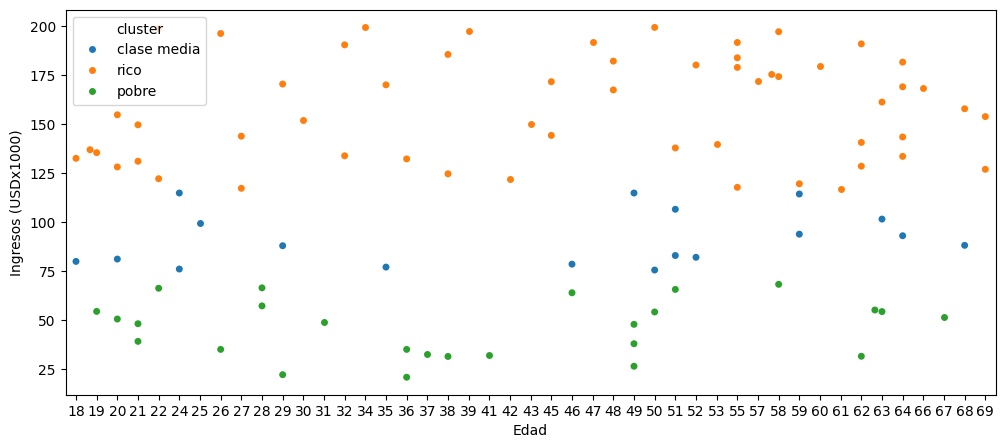

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
x_test=x_test.sample(100)
plt.figure(figsize=(12,5))
sns.swarmplot(data=x_test,x="Edad",y="Ingresos (USDx1000)", hue="cluster")
plt.show()

Podemos observar que el sesgo tiende a ser menor a medida que tenemos muestras más grandes, pero inevitablemente SIEMPRE estará presente.

Para finalizar, hablemos de los tipos de sesgo que comúnmente podemos encontrar.

## 3. Tipos de sesgo

Esencialmente podemos tener dos tipos de sesgo:

1. **El sesgo debido al muestreo**: es el que acabamos de analizar. Este sesgo lo podemos reducir si tenemos una cantidad **representativa** de muestras y si se hace aleatoriamente.
2. **El sesgo debido a la medición**: este sesgo obedece a la forma como fueron tomados los datos. Por ejemplo, si tomamos datos del peso de un grupo de personas pero la balanza no está calibrada correctamente obtendremos un sesgo en cada medición.

## 4. Aspectos a tener en cuenta

- El sesgo es un error en la estimación de un parámetro estadístico (media, varianza, etc.) comparado con el valor real que se tendría en la población.
- El sesgo SIEMPRE estará presente cuando tenemos una muestra.
- Esto quiere decir que las estimaciones que hagamos tendrán un **margen de error** o un **rango de incertidumbre** (no podemos confiar ciegamente en estos valores)
- Podemos reducir el sesgo si usamos muestreo aleatorio (si aplica para el problema que estemos analizando) y si usamos una cantidad **representativa de datos**.